# **AP155 Lab Assignment**
## Module 2: Solution of Linear and Nonlinear Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.



### Student Information

_Full Name (Last Name, First Name)_: DANAC, Nathan Gabriel C.\
_Student No._: 2021 - 12517\
_Section_: THU-HX-3

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Nathan Gabriel C. Danac

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/30
* Problem 2 - XX/30
* Problem 3 - XX/40



Importing our favorite package

In [1]:
import numpy as np

### PROBLEM 1

**Solve for eigenvalues and eigenvectors of a symmetric matrix**

1. Use numpy's $\tt linalg$ package to find the eigenvalues and eigenvectors of the ff. symmetrix matrix *(15 pts.)*:

$ \begin{equation}
{\bf A} =
\begin{pmatrix}
8 & -2 & -20 \\
-2 & -3 & -9 \\
-20 & -9 & -3
\end{pmatrix} \end{equation} $

2. Check your answer numerically; that is, check that $\bf AV = VD$, where the $N$ x $N$ matrix $\bf V$ has the eigenvectors as its columns and $\bf D$ is the diagonal matrix with the eigenvalues $\lambda_i$ as its diagonal entries. *(15 pts.)*

In [2]:
#Import array and eigh from numpy
from numpy import array
from numpy.linalg import eigh

#Defining the given matrix A
A = array([[8, -2, -20], [-2, -3, -9], [-20, -9, -3]], float)

#Using numpy.linalg.eigh to find the eigenvalues and eigenvectors of A as x and v, respectively
x, V = eigh(A)
#Creating a diagonal matrix with the eigenvalues as the entries
D = np.diag(x)

#Print the eigenvalues and eigenvectors
print(x, V)

[-21.99606195   0.16021522  23.83584674] [[ 0.52496527  0.36793396 -0.76748685]
 [ 0.40892672 -0.89987151 -0.15169114]
 [ 0.74645187  0.2342133   0.62285932]]


To prove $AV = VD$, their difference must be zero. $$AV - VD = 0$$

In [3]:
print(A@V - V@D)

[[ 1.77635684e-15  5.96744876e-16  0.00000000e+00]
 [-1.77635684e-15 -1.05471187e-15  1.33226763e-15]
 [ 3.55271368e-15 -4.37150316e-16  8.88178420e-15]]


The resulting array is not quite zero, but the values are very small. This is the result of truncation errors with the dot product operation.

In [4]:
#Use np.around() to account for truncation errors
print(np.around(A@V, 10) - np.around(V@D,10))

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


The output $AV - VD = 0$ reveals that $AV = VD$. Hence, we have verified the solution of the method.

### PROBLEM 2

**Solve a nonlinear equation using the relaxation method**

Consider the equation $x=1- e^{-cx}$, where $c$ is a known parameter and $x$ is unknown. This equation arises in a variety of situations, including the physics of contact processes, mathematical models of epidemics, and the theory of random graphs.

1. Write a program to solve this equation for $x$ using the relaxation method for the case $c = 2$. Calculate your solution to an accuracy of at least $10^{-6}$. *(10 pts.)*

2. Modify your program to calculate the solution for values of $c$ from 0 to 3 in steps of 0.01. *(10 pts.)*

3. Make a plot of $x$ as a function of $c$. Describe the different regimes that you see. *(10 pts.)*

In [5]:
#Importing the exponential function from the math package
from math import exp

#Defining the accuracy,
acc = 1e-6

def relax(c):
  #Setting our initial guess for x
  x = 1
  #Assuming the error is initially maximized,
  err = 1

  #Create a while loop that runs until the threshold for accuracy is satisfied.
  while abs(err) > acc:
    #Evaluating the new value of x
    x2 = 1 - exp(-c*x)
    #Computing the error
    err = (x - x2)/(1 - (exp(2*x))/2)
    #Replacing x
    x = x2

  return x

#Evaluating for c = 2
print(relax(2))

0.7968126311118457


In the while loop above, the error becomes smaller with each iteration. As the distance betwen $x$ and $x'$ becomes smaller, we are approaching the true value of the root. Eventually, the "error" reaches a threshold value we are satisfied with, and we break the loop.

We can compute that an array running from $0$ to $3$ with interval $0.01$ is an evenly-spaced mesh with 300 divisions.
$$300\div 0.01 = 300$$

In [6]:
#Initializing the arrays
y_arr = []
#Creating an evenly spaced array from 0 to 3 with interval 0.01
x_arr = np.linspace(0, 3, 300)

#Filling in y_arr using the relax function
for k in x_arr:
  y_arr.append(relax(k))

#Printing the last value
print(x_arr[-1], y_arr[-1])

3.0 0.9404801006527044


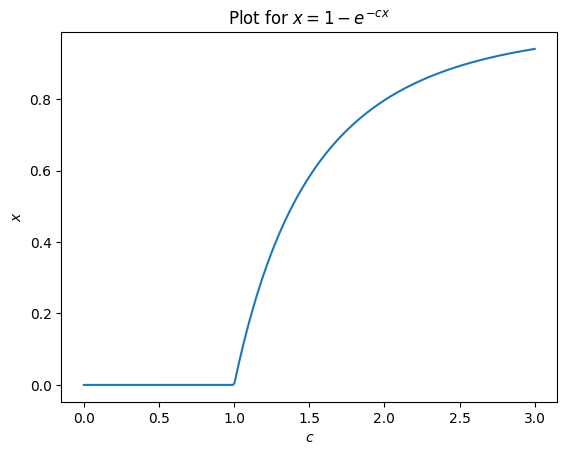

In [7]:
#Plotting using matplotlib.pyplot
import matplotlib.pyplot as plt

#Plotting the data
plt.plot(x_arr, y_arr)
#Setting axes labels
plt.ylabel("$x$")
plt.xlabel("$c$")
#Setting title
plt.title("Plot for $x = 1 - e^{-cx}$")

plt.show()

From the plot, we can see that the $x = 0$ for $0 \leq c < 1$. This is expected mathematically, since $x = 0$ is the only valid solution for $0 \leq c < 1$. The term $e^{-cx}$ on the RHS of the equation grows exponentially for $c < 1$. Hence, the growth of the $x$ term on the LHS cannot match it, leaving $x = 0$ as the only root.

As the graph reaches $c > 1$, it begins to grow logarithmically. We can rewrite the equation as $$\log(x - 1) = -cx$$

Hence, this behavior is expected. It is important to note that $x = 0$ remains a valid solution for this interval, but given our initial guess, the program approaches the non-zero root. This is rather useful, since $x = 0$ is a trivial solution.

### PROBLEM 3

**Physics Application: Calculating the Lagrange point**

_Refer to Exercise 6.16 of the Newman text._ The $L_1$ Lagrange point is the point between the Earth and the Moon at which a satellite will orbit the Earth in perfect synchrony with the Moon, staying always in between the two.

Assuming circular orbits, and assuming that the Earth is much more massive than either the Moon or the satellite, the distance $r$ from the center of the Earth to the $L_1$ point satisfies
$$ \begin{equation}
\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,
\end{equation} $$
where $R$ is the distance from the Earth to the Moon, $M$ and $m$ are the Earth and Moon masses, $G$ is Newton's gravitational constant, and $\omega$ is the angular velocity of both the Moon and the satellite.

Use Newton's method to solve for the distance r from the Earth to the $L_1$ point. Compute a solution accurate to at least four significant figures.

In Newton's method, we estimate the root of the function $f(x)$ by taking its slope at $x$ and using that to find a point $x'$ closer to the root. Over a sufficient amount of repititions, we can find the root of $f(x)$.

$$x' = x - \frac{f(x)}{f'(x)}$$

Let the function be $$L(r) = \frac{GM}{r^2} - \frac{Gm}{(R - r)^2} - \omega^2 r$$
Taking its derivative, $$L'(r) = -\frac{2GM}{r^3} - \frac{2GM}{(R - r)^3} - \omega^2$$
Substituting into the formula above, $$r' = r - \frac{\frac{GM}{r^2} - \frac{Gm}{(R - r)^2} - \omega^2 r}{-\frac{2GM}{r^3} - \frac{2GM}{(R - r)^3} - \omega^2}$$
Let
$$\Delta = \frac{L(r)}{L'(r)} = \frac{\frac{GM}{r^2} - \frac{Gm}{(R - r)^2} - \omega^2 r}{-\frac{2GM}{r^3} - \frac{2GM}{(R - r)^3} - \omega^2}$$
so
$$r' = r - \Delta$$

In [8]:
#Defining constants
G = 6.674e-11
M = 5.974e24
m = 7.348e22
R = 3.844e8
w = 2.662e-6

#Defining our desired accuracy
acc = 1e-4

#Defining a function to use Newton's method, with an initial guess r
def newton(r):
  #Initializing our delta variable
  delta = 1.0

  #Repeat until we reach the accuracy threshold
  while abs(delta) > acc:
    #From the formula shown above,
    delta = ((G*M)/r**2 - (G*m)/(R - r)**2 - r*w**2)/(-2*(G*M)/r**3 - 2*(G*M)/(R - r)**3 - w**2)
    #Updating our guess for the L1 point
    r -= delta

  return r

#Use Newton's method with initial guess equal to half the distance between the Earth and its moon
print(newton(R/2))

326045071.66044
